 ##### 10. Практика. Статистические тесты в контексте EDA
Теперь, когда мы по отдельности разобрались со всеми шагами проверки статистических гипотез, настало время применить их все на практике.
Прежде чем приступить, давайте вспомним порядок проверки статистической гипотезы.

Задание 10.1
Упорядочите этапы проверки статистической гипотезы:
1. Построение нулевой и альтернативной гипотез
2. Выбор уровня значимости α
3. Сбор данных для проверки гипотезы
4. Выбор и проведение статистического теста, вычисление p-value
5. Сравнение p-value с уровнем значимости α и вывод, отклонить или не отклонить

### ИССЛЕДОВАНИЕ ДАННЫХ СТРАХОВОЙ КОМПАНИИ
Рассмотрим, как можно использовать статистические тесты для исследования выплат на лечение клиентов страховой компании.
- Данные к скринкасту https://www.kaggle.com/datasets/mirichoi0218/insurance/
- Ноутбук к скринкасту

#### ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА
HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

##### Постановка задачи

In [ ]:
Наименование столбца	Описание

work_year	                    Год, в котором была выплачена зарплата.

experience_level	                    Опыт работы на этой должности в течение года со следующими возможными значениями:
                                        - EN — Entry-level/Junior;
                                        - MI — Mid-level/Intermediate;
                                        - SE — Senior-level/Expert;
                                        - EX — Executive-level/Director.

employment_type	                    Тип трудоустройства для этой роли:
                                        - PT — неполный рабочий день;
                                        - FT — полный рабочий день;
                                        - CT — контракт;
                                        - FL — фриланс.
                                            
job_title	                    Роль, в которой соискатель работал в течение года.

salary	                    Общая выплаченная валовая сумма заработной платы.
    
salary_currency	                    Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.

salary_in_usd	                    Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).

employee_residence	                    Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.

remote_ratio	                    Общий объём работы, выполняемой удалённо. Возможные значения:
                                        - 0 — удалённой работы нет (менее 20 %);
                                        - 50 — частично    работа;
                                        - 100 — полностью удалённая работа (более 80 %).

company_location	                    Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.

company_size	                    Среднее количество людей, работавших в компании в течение года:
                                        - S — менее 50 сотрудников (небольшая компания);
                                        - M — от 50 до 250 сотрудников (средняя компания);
                                        - L — более 250 сотрудников (крупная компания).

Оригинальный датасет: “Data Science Job Salaries” (kaggle.com) https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

* В процессе своего анализа вы должны:
1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
2. А также ответить на ключевые вопросы HR-агентства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

* Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.
Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:
1. тесты для количественного признака:
- для одной выборки;
- для двух выборок;
- для нескольких выборок;
- тест для категориальных признаков.

*Результатом вашей работы должен стать ноутбук (IPYNB-файл) с кодом для исследования, а также с выводами и рассуждениями, полученными на основе разведывательного анализа.*
В качестве ответа вставьте в форму ниже файл в формате IPYNB. Ментор проверит ваше решение, поставит оценку и даст комментарии.

##### Загрузка и обработка данных 

In [3]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [4]:
data = pd.read_csv('ds_salaries.csv')
data.head()
# data.tail(3)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [29]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


##### Описательный анализ 

data.convert_dtypes().dtypes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В датасете 607 записей (без пропущенных значений)

In [6]:
# Проверим данные на наличие полных дубликатов:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))
# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 0
Размер таблицы после удаления дубликатов: (607, 12)


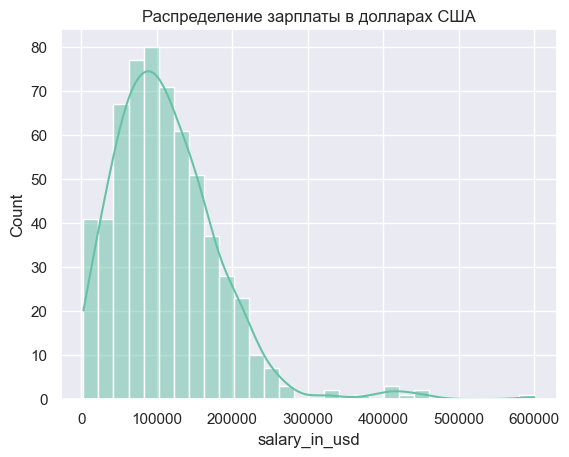

In [7]:
ax = sns.histplot(data['salary_in_usd'], bins=30, kde=True)
# ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Распределение зарплаты в долларах США')
plt.show()

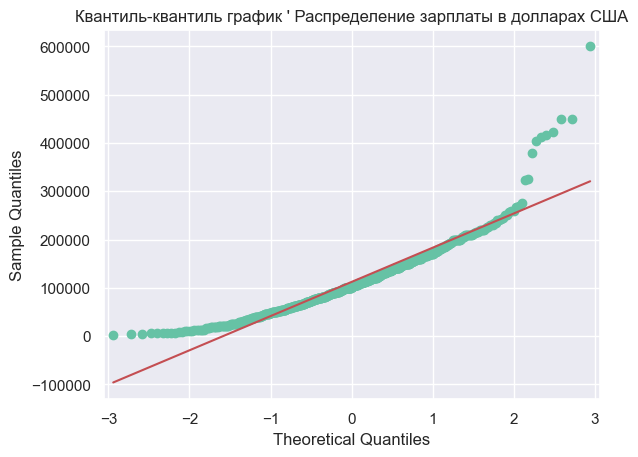

In [8]:
# задаём параметры квантиль-квантиль графика
sm.qqplot(data['salary_in_usd'], line='s')
plt.title('Квантиль-квантиль график \' Распределение зарплаты в долларах США') # отображаем квантиль-квантиль график
plt.show()

Распределение Распределение зарплаты

Форма гистограммы несимметрична. Отсюда делаем промежуточный вывод: распределение зарплаты в долларах США не является нормальным.

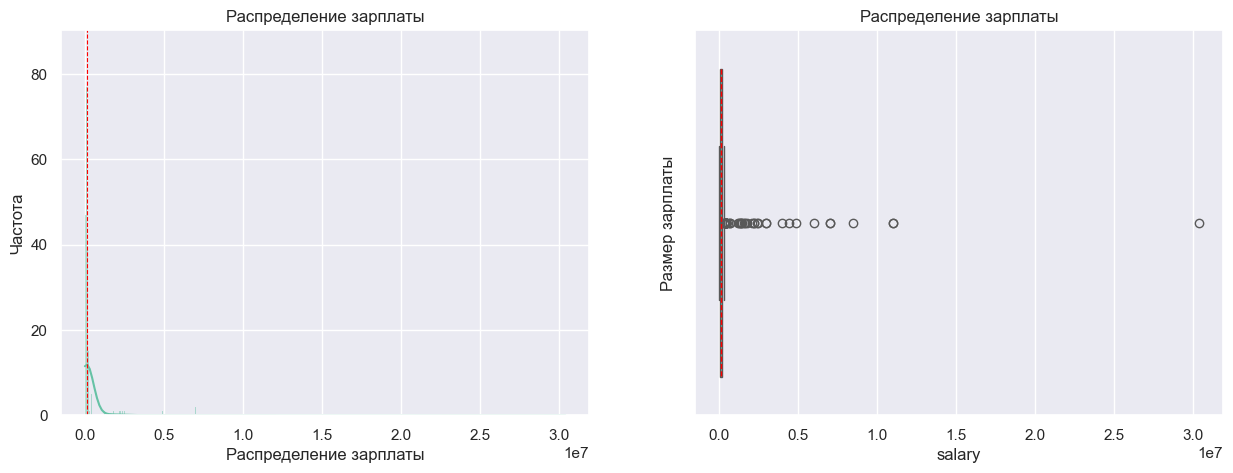

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['salary'], kde=True, ax=axes[0])
axes[0].set(xlabel='Распределение зарплаты', ylabel='Частота')
axes[0].set_title('Распределение зарплаты')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер зарплаты')
axes[1].set_title('Распределение зарплаты')

plt.show()

In [10]:
data_agg = data['salary'].describe().round(2).to_frame()
data_agg.columns = ['Размер зарплаты год в котором выплачена зарплата']
data_agg

,Размер зарплаты год в котором выплачена зарплата
count,607.00
mean,324000.06
std,1544357.49
min,4000.00
25%,70000.00
50%,115000.00
75%,165000.00
max,30400000.00


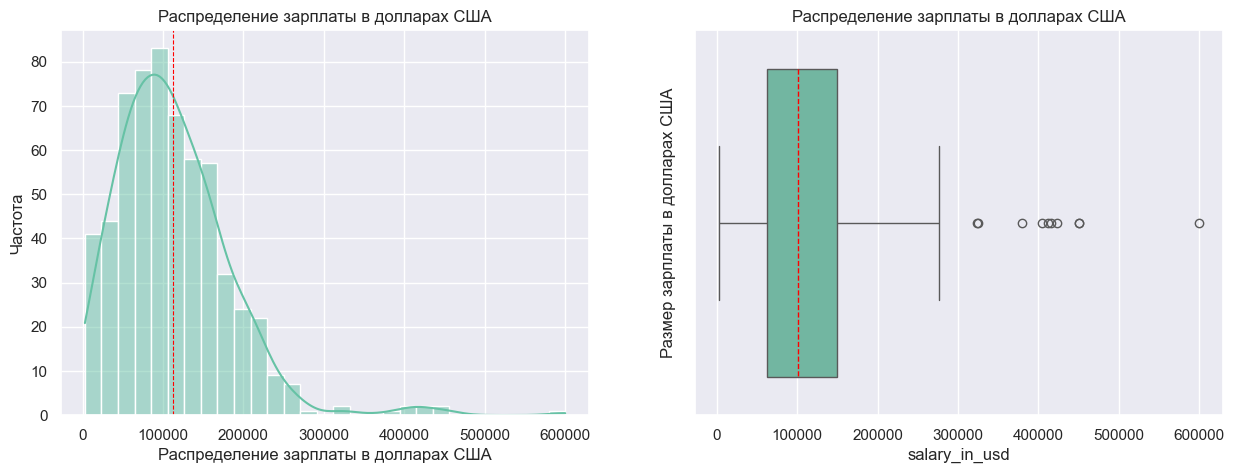

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Распределение зарплаты в долларах США', ylabel='Частота')
axes[0].set_title('Распределение зарплаты в долларах США')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер зарплаты в долларах США')
axes[1].set_title('Распределение зарплаты в долларах США')

plt.show()

In [12]:
data_agg = data['salary_in_usd'].describe().round(2).to_frame()
data_agg.columns = ['Размер зарплаты год в котором выплачена зарплата в долларах США']
data_agg

,Размер зарплаты год в котором выплачена зарплата в долларах США
count,607.00
mean,112297.87
std,70957.26
min,2859.00
25%,62726.00
50%,101570.00
75%,150000.00
max,600000.00


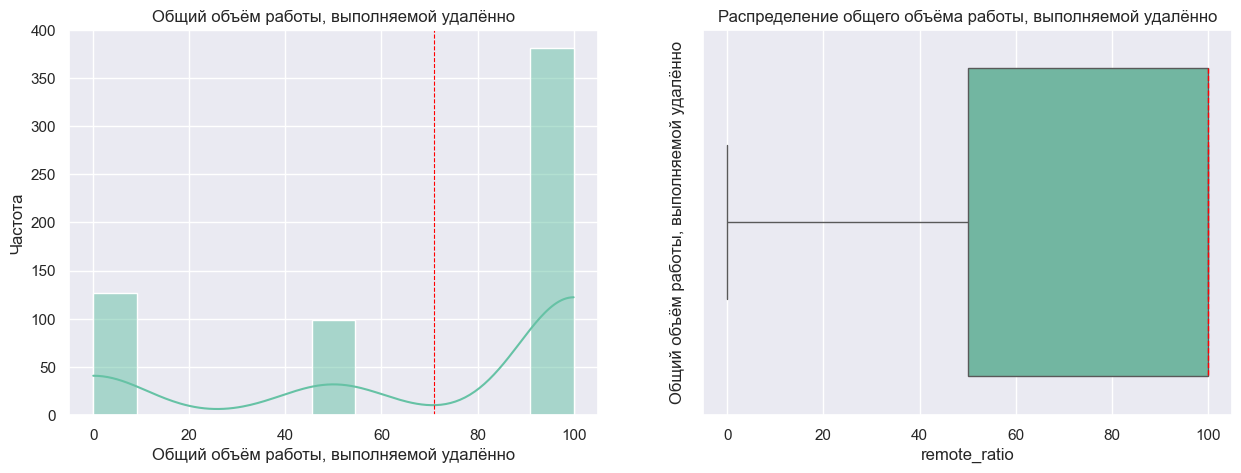

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['remote_ratio'], kde=True, ax=axes[0])
axes[0].set(xlabel='Общий объём работы, выполняемой удалённо', ylabel='Частота')
axes[0].set_title('Общий объём работы, выполняемой удалённо')
axes[0].axvline(data['remote_ratio'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['remote_ratio'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Общий объём работы, выполняемой удалённо')
axes[1].set_title('Распределение общего объёма работы, выполняемой удалённо')

plt.show()

In [14]:
data_agg = data['remote_ratio'].describe().round(2).to_frame()
data_agg.columns = ['Общий объём работы, выполняемой удалённо']
data_agg

,"Общий объём работы, выполняемой удалённо"
count,607.00
mean,70.92
std,40.71
min,0.00
25%,50.00
50%,100.00
75%,100.00
max,100.00


2. Категориальные признаки: experience_level-string[python], employment_type-string[python], job_title-string[python], salary_currency-string[python], employee_residence-string[python], 
company_location-string[python], company_size-string[python]

1. На зарплату влияют: 1. Опыт работы на этой должности в течение года (experience_level)

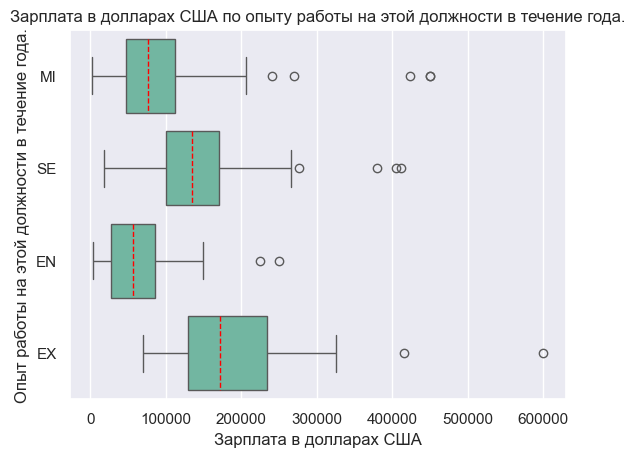

In [15]:
ax = sns.boxplot(data, x='salary_in_usd', y='experience_level', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='Опыт работы на этой должности в течение года.')
plt.title('Зарплата в долларах США по опыту работы на этой должности в течение года.')
plt.show()

In [16]:
data_agg = data.groupby('experience_level')['salary_in_usd'].describe().round(2) #.to_frame()
print('Зарплата в долларах США в зависимости от должности в течение года')
data_agg # - EN — Entry-level/Junior;- MI — Mid-level/Intermediate; - SE — Senior-level/Expert; - EX — Executive-level/Director.

Зарплата в долларах США в зависимости от должности в течение года


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.32,44395.54,4000.0,27505.0,56500.0,85425.75,250000.0
EX,26.0,199392.04,117071.26,69741.0,130006.5,171437.5,233750.00,600000.0
MI,213.0,87996.06,63901.06,2859.0,48000.0,76940.0,112000.00,450000.0
SE,280.0,138617.29,57691.98,18907.0,100000.0,135500.0,170000.00,412000.0


На первый взгляд распределения зарплаты выглядит для разных должностей различны.

2. На зарплату влияют: 2. Тип трудоустройства для этой роли (employment_type)                 

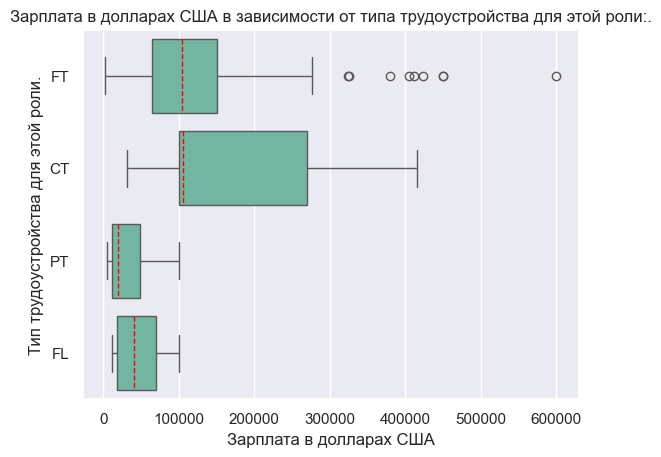

In [17]:
ax = sns.boxplot(data, x='salary_in_usd', y='employment_type', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='Тип трудоустройства для этой роли.')
plt.title('Зарплата в долларах США в зависимости от типа трудоустройства для этой роли:.')
plt.show() # - PT — неполный рабочий день;- FT — полный рабочий день;- CT — контракт;- FL — фриланс.

In [18]:
data_agg = data.groupby('employment_type')['salary_in_usd'].describe().round(2) #.to_frame()
print('Зарплата в долларах США в зависимости от типа трудоустройства для этой роли')
data_agg # - PT — неполный рабочий день;- FT — полный рабочий день;- CT — контракт;- FL — фриланс.

Зарплата в долларах США в зависимости от типа трудоустройства для этой роли


,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
CT,5.0,184575.00,156250.89,31875.0,100000.00,105000.0,270000.0,416000.0
FL,4.0,48000.00,40529.82,12000.0,18000.00,40000.0,70000.0,100000.0
FT,588.0,113468.07,69476.47,2859.0,64962.25,104196.5,150000.0,600000.0
PT,10.0,33070.50,31472.91,5409.0,12000.00,18817.5,48370.0,100000.0


На первый взгляд распределения зарплаты выглядит для разных типов трудоустройства различны.

3. На зарплату влияют: 3. Среднее количество людей, работавших в компании в течение года (company_size)                    

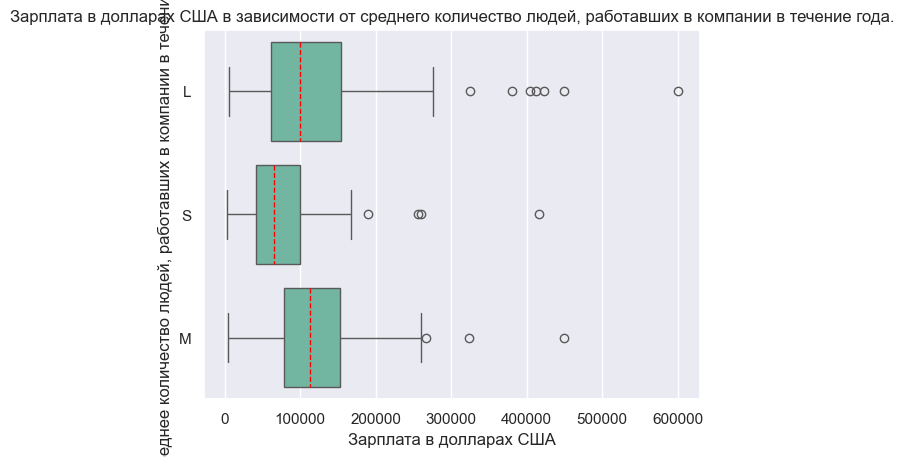

In [19]:
ax = sns.boxplot(data, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel=' Среднее количество людей, работавших в компании в течение года')
plt.title('Зарплата в долларах США в зависимости от среднего количество людей, работавших в компании в течение года.')
plt.show() #- S — менее 50 сотрудников (небольшая компания);- M — от 50 до 250 сотрудников (средняя компания);- L — более 250 сотрудников (крупная компания).

In [20]:
data_agg = data.groupby('company_size')['salary_in_usd'].describe().round(2) #.to_frame()
print('Зарплата в долларах США в зависимости от среднего количество людей, работавших в компании в течение года.')
data_agg

Зарплата в долларах США в зависимости от среднего количество людей, работавших в компании в течение года.


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,198.0,119242.99,86156.74,5882.0,61041.75,100000.0,154600.0,600000.0
M,326.0,116905.47,59287.69,4000.0,78131.50,113188.0,152875.0,450000.0
S,83.0,77632.67,63461.71,2859.0,41943.00,65000.0,100000.0,416000.0


На первый взгляд распределения зарплаты выглядит различны  в зависимости от среднего количество людей 

4. На зарплату влияют: 4. Роль, в которой соискатель работал в течение года (job_title)

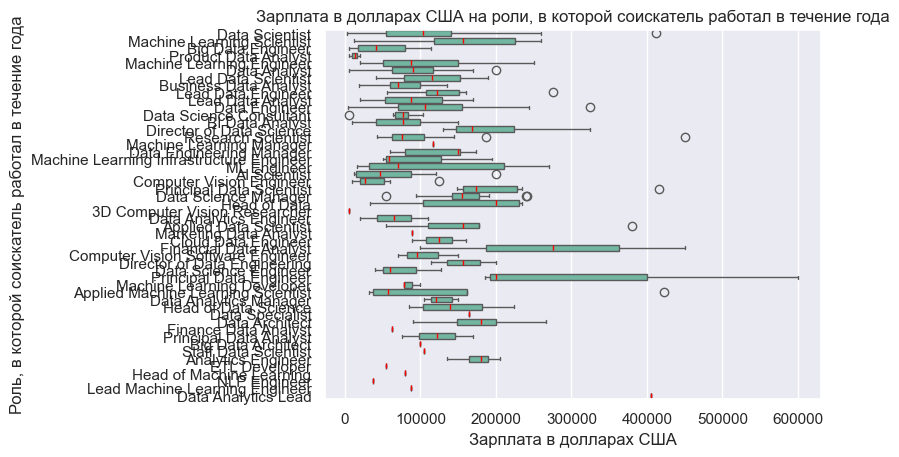

In [21]:
ax = sns.boxplot(data, x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='Роль, в которой соискатель работал в течение года')
plt.title('Зарплата в долларах США на роли, в которой соискатель работал в течение года')
plt.show()

In [22]:
data_agg = data.groupby('job_title')['salary_in_usd'].describe().round(2) #.to_frame()
print('Зарплата в долларах США в зависимости от роли, в которой соискатель работал в течение года')
data_agg 

Зарплата в долларах США в зависимости от роли, в которой соискатель работал в течение года


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
3D Computer Vision Researcher,1.0,5409.00,NaN,5409.0,5409.00,5409.0,5409.00,5409.0
AI Scientist,7.0,66135.57,70152.16,12000.0,15026.50,45896.0,87500.00,200000.0
Analytics Engineer,4.0,175000.00,29508.08,135000.0,165000.00,179850.0,189850.00,205300.0
Applied Data Scientist,5.0,175655.00,123647.19,54238.0,110037.00,157000.0,177000.00,380000.0
Applied Machine Learning Scientist,4.0,142068.75,188246.70,31875.0,36768.75,56700.0,162000.00,423000.0
BI Data Analyst,6.0,74755.17,50989.56,9272.0,40944.25,76500.0,99500.00,150000.0
Big Data Architect,1.0,99703.00,NaN,99703.0,99703.00,99703.0,99703.00,99703.0
Big Data Engineer,8.0,51974.00,42954.76,5882.0,17557.00,41305.5,79756.00,114047.0
Business Data Analyst,5.0,76691.20,43814.85,18442.0,59102.00,70912.0,100000.00,135000.0


На первый взгляд распределения зарплаты выглядит различны  в зависимости от роли, в которой соискатель работал в течение года.

5. На зарплату влияют: 5. Основная страна проживания сотрудника в течение рабочего года                    

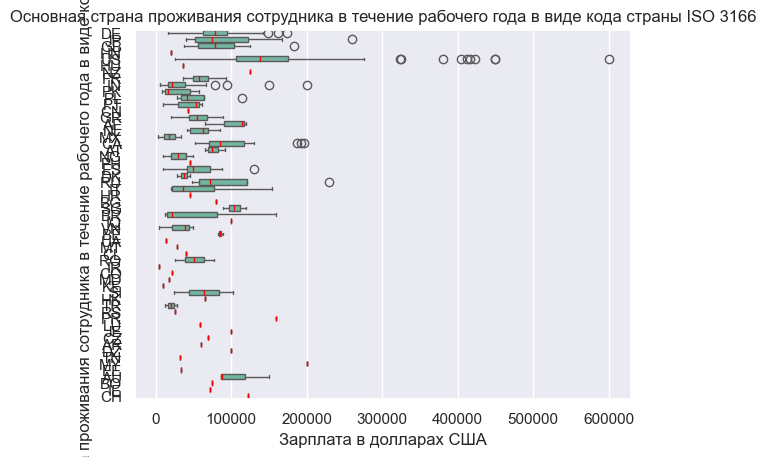

In [23]:
ax = sns.boxplot(data, x='salary_in_usd', y='employee_residence', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166')
plt.title('Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166')
plt.show()

In [24]:
data_agg = data.groupby('employee_residence')['salary_in_usd'].describe().round(2) #.to_frame()
print('Зарплата в долларах США в зависимости от основная страна проживания сотрудника в течение рабочего годао')
data_agg # - PT — неполный рабочий день;- FT — полный рабочий день;- CT — контракт;- FL — фриланс.

Зарплата в долларах США в зависимости от основная страна проживания сотрудника в течение рабочего годао


,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
AE,3.0,100000.00,30413.81,65000.0,90000.00,115000.0,117500.00,120000.0
AR,1.0,60000.00,NaN,60000.0,60000.00,60000.0,60000.00,60000.0
AT,3.0,76738.67,13386.02,64849.0,69489.50,74130.0,82683.50,91237.0
AU,3.0,108042.67,36337.91,86703.0,87064.00,87425.0,118712.50,150000.0
BE,2.0,85699.00,4179.00,82744.0,84221.50,85699.0,87176.50,88654.0
BG,1.0,80000.00,NaN,80000.0,80000.00,80000.0,80000.00,80000.0
BO,1.0,75000.00,NaN,75000.0,75000.00,75000.0,75000.00,75000.0
BR,6.0,54634.67,61537.35,12000.0,14402.50,21453.5,81000.00,160000.0
CA,29.0,97085.31,39767.44,52000.0,70912.00,85000.0,117104.00,196979.0


На первый взгляд распределения зарплаты выглядит различны  в зависимости от основной страны проживания сотрудника в течение рабочего года.

6. На зарплату влияют: 6. Страна главного офиса работодателя или филиала по контракту (company_location)

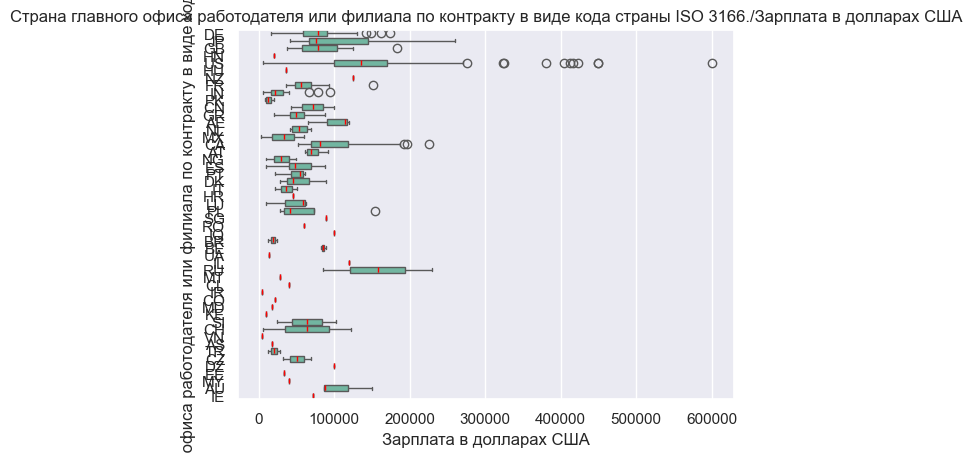

In [25]:
ax = sns.boxplot(data, x='salary_in_usd', y='company_location', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.')
plt.title('Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166./Зарплата в долларах США')
plt.show()

In [26]:
data_agg = data.groupby('company_location')['salary_in_usd'].describe().round(2) #.to_frame()
print('Зарплата в долларах США в зависимости от страна главного офиса работодателя или филиала по контракту')
data_agg 

Зарплата в долларах США в зависимости от страна главного офиса работодателя или филиала по контракту


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
AE,3.0,100000.00,30413.81,65000.0,90000.00,115000.0,117500.00,120000.0
AS,1.0,18053.00,NaN,18053.0,18053.00,18053.0,18053.00,18053.0
AT,4.0,72920.75,13332.78,61467.0,64003.50,69489.5,78406.75,91237.0
AU,3.0,108042.67,36337.91,86703.0,87064.00,87425.0,118712.50,150000.0
BE,2.0,85699.00,4179.00,82744.0,84221.50,85699.0,87176.50,88654.0
BR,3.0,18602.67,5555.76,12901.0,15904.00,18907.0,21453.50,24000.0
CA,30.0,99823.73,46329.10,52000.0,69730.00,81895.5,117916.25,225000.0
CH,2.0,64114.00,82352.48,5882.0,34998.00,64114.0,93230.00,122346.0
CL,1.0,40038.00,NaN,40038.0,40038.00,40038.0,40038.00,40038.0


На первый взгляд распределения зарплаты выглядит различны  в зависимости от страна главного офиса работодателя или филиала по контракту.

In [ ]:
Зарплата в долларах США

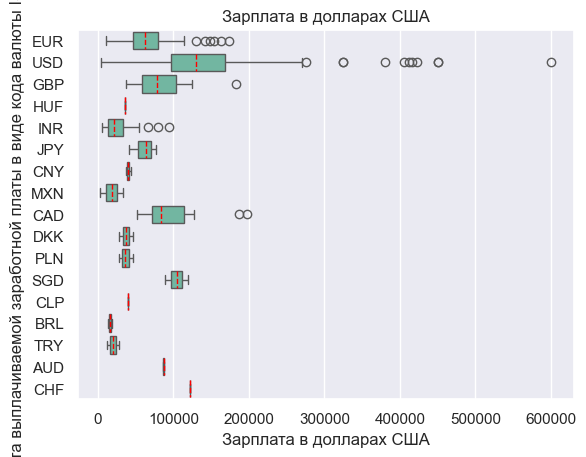

In [27]:
ax = sns.boxplot(data, x='salary_in_usd', y='salary_currency', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.')
plt.title('Зарплата в долларах США')
plt.show()

In [28]:
data_agg = data.groupby('salary_currency')['salary_in_usd'].describe().round(2)
print('Зарплата в долларах США')
data_agg

Зарплата в долларах США


,count,mean,std,min,25%,50%,75%,max
salary_currency,,,,,,,,
AUD,2.0,87064.00,510.53,86703.0,86883.50,87064.0,87244.50,87425.0
BRL,2.0,15904.00,4246.88,12901.0,14402.50,15904.0,17405.50,18907.0
CAD,18.0,97222.89,40724.80,52396.0,71130.50,83264.5,113750.75,196979.0
CHF,1.0,122346.00,NaN,122346.0,122346.00,122346.0,122346.00,122346.0
CLP,1.0,40038.00,NaN,40038.0,40038.00,40038.0,40038.00,40038.0
CNY,2.0,40283.50,4309.82,37236.0,38759.75,40283.5,41807.25,43331.0
DKK,2.0,37252.50,12223.75,28609.0,32930.75,37252.5,41574.25,45896.0
EUR,95.0,65751.47,31085.05,10354.0,46784.00,62649.0,79515.00,173762.0
GBP,44.0,81670.98,29736.20,37300.0,58234.50,78526.0,103545.50,183228.0


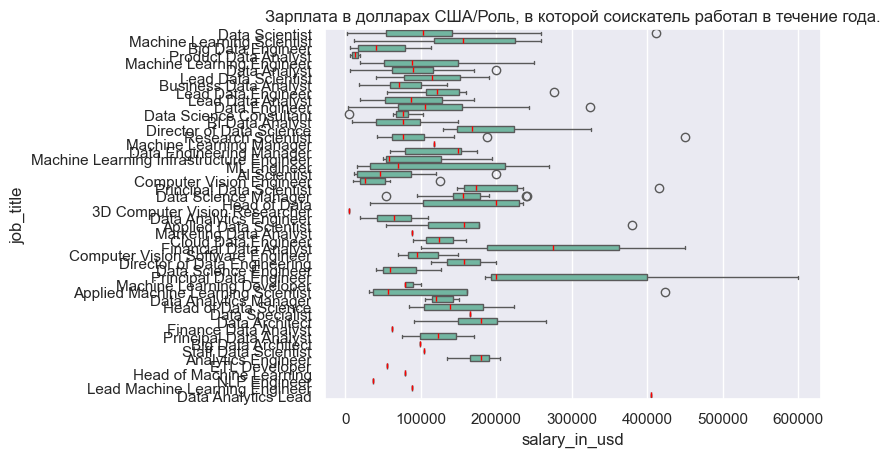

In [37]:
sns.boxplot(data, x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='Роль, в которой соискатель работал в течение года.')
plt.title('Зарплата в долларах США/Роль, в которой соискатель работал в течение года.')
plt.show()

In [38]:
data_agg = data.groupby('salary_currency')['salary_in_usd'].describe().round(2)
print('Зарплата в долларах США')
data_agg

Зарплата в долларах США


,count,mean,std,min,25%,50%,75%,max
salary_currency,,,,,,,,
AUD,2.0,87064.00,510.53,86703.0,86883.50,87064.0,87244.50,87425.0
BRL,2.0,15904.00,4246.88,12901.0,14402.50,15904.0,17405.50,18907.0
CAD,18.0,97222.89,40724.80,52396.0,71130.50,83264.5,113750.75,196979.0
CHF,1.0,122346.00,NaN,122346.0,122346.00,122346.0,122346.00,122346.0
CLP,1.0,40038.00,NaN,40038.0,40038.00,40038.0,40038.00,40038.0
CNY,2.0,40283.50,4309.82,37236.0,38759.75,40283.5,41807.25,43331.0
DKK,2.0,37252.50,12223.75,28609.0,32930.75,37252.5,41574.25,45896.0
EUR,95.0,65751.47,31085.05,10354.0,46784.00,62649.0,79515.00,173762.0
GBP,44.0,81670.98,29736.20,37300.0,58234.50,78526.0,103545.50,183228.0


In [ ]:
Медианное значение зарплата Data Scientist

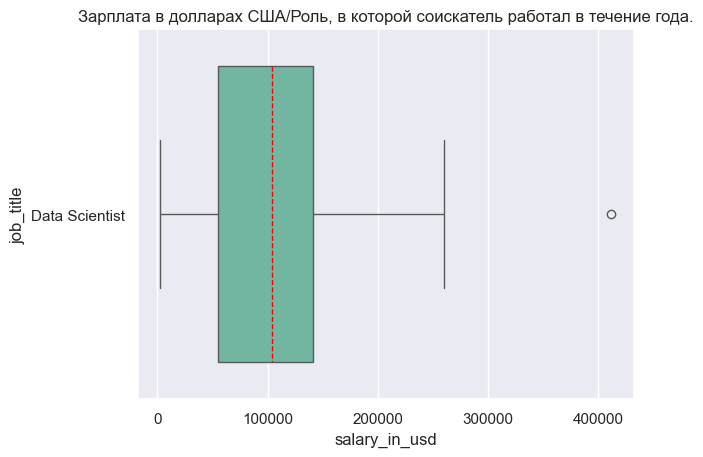

In [39]:
sns.boxplot(data=data[data['job_title'] == 'Data Scientist'], x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='Роль, в которой соискатель работал в течение года.')
plt.title('Зарплата в долларах США/Роль, в которой соискатель работал в течение года.')
plt.show()

In [40]:
data_agg = data[data['job_title'] == 'Data Scientist'].groupby('salary_currency')['salary_in_usd'].describe().round(2)
print('Зарплата в долларах США')
data_agg

Зарплата в долларах США


,count,mean,std,min,25%,50%,75%,max
salary_currency,,,,,,,,
AUD,1.0,86703.00,NaN,86703.0,86703.00,86703.0,86703.0,86703.0
BRL,1.0,12901.00,NaN,12901.0,12901.00,12901.0,12901.0,12901.0
CAD,5.0,77787.00,19301.65,52396.0,69336.00,75774.0,87738.0,103691.0
CHF,1.0,122346.00,NaN,122346.0,122346.00,122346.0,122346.0,122346.0
CLP,1.0,40038.00,NaN,40038.0,40038.00,40038.0,40038.0,40038.0
EUR,22.0,57591.68,21531.70,21669.0,40486.25,52256.5,75370.0,91237.0
GBP,11.0,88177.36,41393.50,39263.0,60847.00,76958.0,110808.0,183228.0
HUF,1.0,35735.00,NaN,35735.0,35735.00,35735.0,35735.0,35735.0
INR,9.0,23838.33,11758.72,5679.0,16904.00,28399.0,31615.0,40481.0


In [ ]:
Изменение медианного значение зарплата Data Scientist по годам

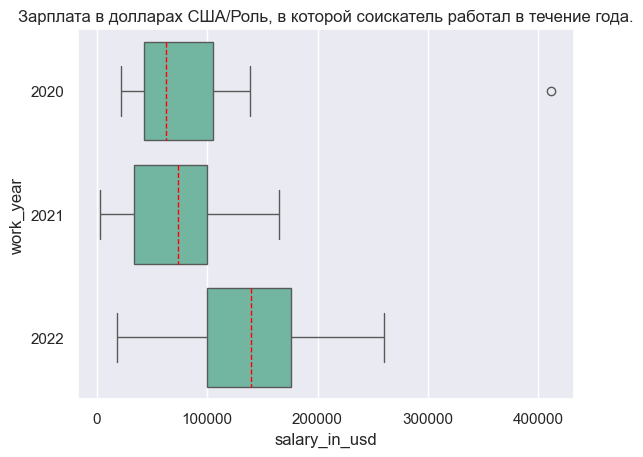

In [47]:
sns.boxplot(data=data[data['job_title'] == 'Data Scientist'], x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='Роль, в которой соискатель работал в течение года.')
plt.title('Зарплата в долларах США/Роль, в которой соискатель работал в течение года.')
plt.show()

In [49]:
data_agg = data[data['job_title'] == 'Data Scientist'].groupby('work_year')['salary_in_usd'].describe().round(2)
print('Зарплата в долларах США')
data_agg

Зарплата в долларах США


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.52,81436.65,21669.0,42197.0,62726.0,105000.0,412000.0
2021,45.0,70671.73,45422.97,2859.0,33808.0,73000.0,100000.0,165000.0
2022,77.0,136172.09,54563.08,18442.0,100000.0,140000.0,176000.0,260000.0


In [91]:
filtered_data = data[(data['job_title'] == 'Data Scientist') & (data['work_year'] == 2022)]
# Описательная статистика по зарплате
data_agg = filtered_data['salary_in_usd'].describe().round(2)
print('Зарплата в долларах США')
print(data_agg)

Зарплата в долларах США
count        77.00
mean     136172.09
std       54563.08
min       18442.00
25%      100000.00
50%      140000.00
75%      176000.00
max      260000.00
Name: salary_in_usd, dtype: float64


In [92]:
filtered_data = data[data['job_title'] == 'Data Scientist']

data_agg = filtered_data.groupby('work_year')['salary_in_usd'].describe().round(2)

print('Зарплата в долларах США по годам')
print(data_agg)

Зарплата в долларах США по годам
           count       mean       std      min       25%       50%       75%  \
work_year                                                                      
2020        21.0   85970.52  81436.65  21669.0   42197.0   62726.0  105000.0   
2021        45.0   70671.73  45422.97   2859.0   33808.0   73000.0  100000.0   
2022        77.0  136172.09  54563.08  18442.0  100000.0  140000.0  176000.0   

                max  
work_year            
2020       412000.0  
2021       165000.0  
2022       260000.0  


Медианного значение зарплата Data Scientist меньше Data Engineer. Есть выбросы по максимальным значениям

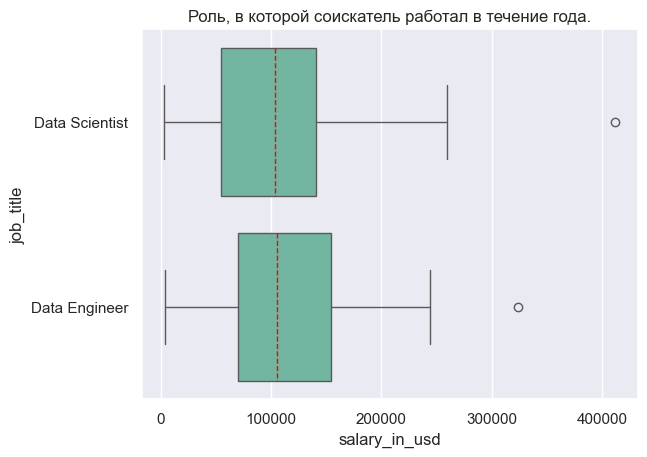

In [61]:
selected_jobs = ['Data Scientist', 'Data Engineer']  # список должностей
filtered_data = data[data['job_title'].isin(selected_jobs)]
sns.boxplot(data=filtered_data, x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
plt.title('Роль, в которой соискатель работал в течение года.')
plt.show()#

In [73]:
data_agg = data[data['job_title'].isin(selected_jobs)].groupby('job_title')['salary_in_usd'].describe().round(2)
print('Зарплата в долларах США')
data_agg

Зарплата в долларах США


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,132.0,112725.00,57629.08,4000.0,70039.5,105500.0,154600.0,324000.0
Data Scientist,143.0,108187.83,64112.84,2859.0,54724.0,103691.0,140850.0,412000.0


In [105]:
filtered_data = data[(data['job_title'] == 'Data Scientist') & (data['work_year'] == 2022)]
# Описательная статистика по зарплате
data_agg = filtered_data['salary_in_usd'].describe().round(2)
print('Зарплата в долларах США Data Scientist')
print(data_agg)

Зарплата в долларах США Data Scientist
count        77.00
mean     136172.09
std       54563.08
min       18442.00
25%      100000.00
50%      140000.00
75%      176000.00
max      260000.00
Name: salary_in_usd, dtype: float64


In [106]:
filtered_data = data[(data['job_title'] == 'Data Engineer') & (data['work_year'] == 2022)]
# Описательная статистика по зарплате
data_agg = filtered_data['salary_in_usd'].describe().round(2)
print('Зарплата в долларах США Data Engineer')
print(data_agg)

Зарплата в долларах США Data Engineer
count        89.0
mean     126375.7
std       55954.4
min       25000.0
25%       78526.0
50%      120000.0
75%      160000.0
max      324000.0
Name: salary_in_usd, dtype: float64


In [120]:
data_agg = data[data['job_title'].isin(selected_jobs)].groupby('work_year')['salary_in_usd'].describe().round(2)
print('Зарплата в долларах США')
data_agg 

Зарплата в долларах США


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,32.0,86723.84,70544.14,21669.0,44869.25,69283.5,107000.0,412000.0
2021,77.0,75879.34,48741.67,2859.0,30428.00,75774.0,109000.0,200000.0
2022,166.0,130919.81,55363.40,18442.0,90403.50,131160.0,165355.0,324000.0


In [93]:
filtered_data = data[data['job_title'].isin(['Data Scientist', 'Data Engineer'])]
data_agg = filtered_data.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Зарплата в долларах США по годам')
print(data_agg)

Зарплата в долларах США по годам
           count       mean       std      min       25%       50%       75%  \
work_year                                                                      
2020        32.0   86723.84  70544.14  21669.0  44869.25   69283.5  107000.0   
2021        77.0   75879.34  48741.67   2859.0  30428.00   75774.0  109000.0   
2022       166.0  130919.81  55363.40  18442.0  90403.50  131160.0  165355.0   

                max  
work_year            
2020       412000.0  
2021       200000.0  
2022       324000.0  


In [112]:
# Фильтрация по нужным должностям
filtered_data = data[data['job_title'].isin(['Data Scientist', 'Data Engineer'])]

# Группировка по job_title и work_year с описательной статистикой по зарплате
data_agg = filtered_data.groupby(['job_title', 'work_year'])['salary_in_usd'].describe().round(2)

print('Зарплата в долларах США по годам и должностям')
print(data_agg)

Зарплата в долларах США по годам и должностям
                          count       mean       std      min       25%  \
job_title      work_year                                                  
Data Engineer  2020        11.0   88162.00  46473.12  33511.0   51320.5   
               2021        32.0   83202.53  52926.53   4000.0   29940.0   
               2022        89.0  126375.70  55954.40  25000.0   78526.0   
Data Scientist 2020        21.0   85970.52  81436.65  21669.0   42197.0   
               2021        45.0   70671.73  45422.97   2859.0   33808.0   
               2022        77.0  136172.09  54563.08  18442.0  100000.0   

                               50%        75%       max  
job_title      work_year                                 
Data Engineer  2020        74130.0  111436.00  188000.0  
               2021        78416.5  111831.25  200000.0  
               2022       120000.0  160000.00  324000.0  
Data Scientist 2020        62726.0  105000.00  412000.0  
     

In [113]:
data_agg = data_agg.reset_index()
print(data_agg.head())

        job_title  work_year  count       mean       std      min      25%  \
0   Data Engineer       2020   11.0   88162.00  46473.12  33511.0  51320.5   
1   Data Engineer       2021   32.0   83202.53  52926.53   4000.0  29940.0   
2   Data Engineer       2022   89.0  126375.70  55954.40  25000.0  78526.0   
3  Data Scientist       2020   21.0   85970.52  81436.65  21669.0  42197.0   
4  Data Scientist       2021   45.0   70671.73  45422.97   2859.0  33808.0   

        50%        75%       max  
0   74130.0  111436.00  188000.0  
1   78416.5  111831.25  200000.0  
2  120000.0  160000.00  324000.0  
3   62726.0  105000.00  412000.0  
4   73000.0  100000.00  165000.0  


In [111]:
filtered_data = data[data['job_title'].isin(['Data Engineer'])]
data_agg = filtered_data.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Зарплата в долларах США по годам Data Engineer')
print(data_agg)

Зарплата в долларах США по годам Data Engineer
           count       mean       std      min      25%       50%        75%  \
work_year                                                                      
2020        11.0   88162.00  46473.12  33511.0  51320.5   74130.0  111436.00   
2021        32.0   83202.53  52926.53   4000.0  29940.0   78416.5  111831.25   
2022        89.0  126375.70  55954.40  25000.0  78526.0  120000.0  160000.00   

                max  
work_year            
2020       188000.0  
2021       200000.0  
2022       324000.0  


In [109]:
filtered_data = data[data['job_title'].isin(['Data Scientist'])]
data_agg = filtered_data.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Зарплата в долларах США по годам Data Scientist')
print(data_agg)

Зарплата в долларах США по годам Data Scientist
           count       mean       std      min       25%       50%       75%  \
work_year                                                                      
2020        21.0   85970.52  81436.65  21669.0   42197.0   62726.0  105000.0   
2021        45.0   70671.73  45422.97   2859.0   33808.0   73000.0  100000.0   
2022        77.0  136172.09  54563.08  18442.0  100000.0  140000.0  176000.0   

                max  
work_year            
2020       412000.0  
2021       165000.0  
2022       260000.0  


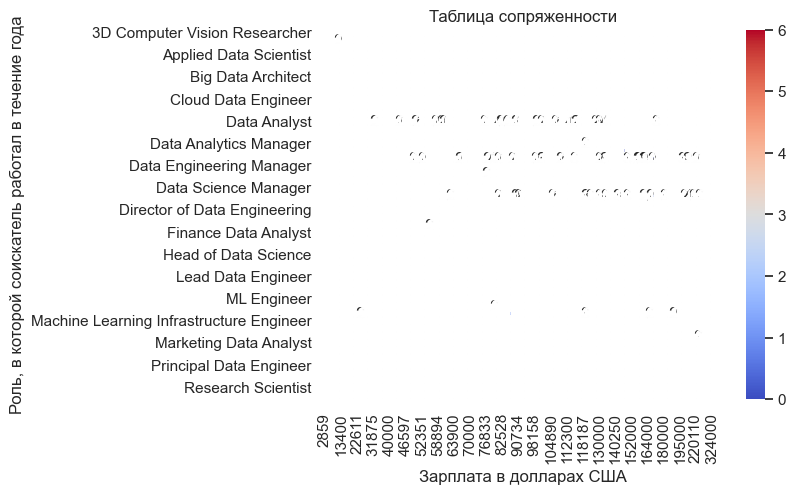

In [48]:
cross_tab = pd.crosstab(index=data['job_title'], columns=data['salary_in_usd'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Зарплата в долларах США', ylabel='Роль, в которой соискатель работал в течение года')
plt.title('Таблица сопряженности')
plt.show()

##### Статический анализ данных

In [47]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

3. Соответствие выводов бизнес-вопросам   

1. В качестве нулевой гипотезы (Н0) обычно берётся утверждение об отсутствии эффекта, т. е. тех изменений, которых мы ожидали, нет.
2. В качестве альтернативной гипотезы (Н1) берётся утверждение о наличии эффекта (обратное нулевой гипотезе), т. е. те изменения, которых мы ожидали, есть.
 Н0-Опыт работы на этой должности в течение года не влияет
 Н1-Опыт работы на этой должности в течение года влияет

 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object

Год, в котором была выплачена зарплата (work_year)

In [39]:
# проводим тест Шапиро — Уилка
alpha = 0.05 
_, p = stats.shapiro(data['work_year'])
print('p-value = %.3f' % (p))
# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.000
Распределение не нормальное


In [68]:
# проводим тест Шапиро — Уилка
alpha = 0.05 
_, p = stats.shapiro(data['remote_ratio'])
print('p-value = %.3f' % (p))
# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.000
Распределение не нормальное


In [69]:
# проводим тест Шапиро — Уилка
alpha = 0.05 
_, p = stats.shapiro(data['salary_in_usd'])
print('p-value = %.3f' % (p))
# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.000
Распределение не нормальное


In [70]:
# проводим тест Шапиро — Уилка
alpha = 0.05 
_, p = stats.shapiro(data['salary'])
print('p-value = %.3f' % (p))
# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.000
Распределение не нормальное


In [64]:
group1 = data['work_year']
group3 = data['salary_in_usd']
statistic, p_value = stats.mannwhitneyu(group1, group3, alternative='greater')
decision_hypothesis(p_value)

p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [65]:
group2 = data['remote_ratio']
group3 = data['salary_in_usd']
statistic, p_value = stats.mannwhitneyu(group2, group3, alternative='greater')
decision_hypothesis(p_value)

p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [66]:
group4 = data['salary']
group3 = data['salary_in_usd']
statistic, p_value = stats.mannwhitneyu(group4, group3, alternative='greater')
decision_hypothesis(p_value)

p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


In [67]:
group1 = data['work_year']
group2 = data['remote_ratio']
group3 = data['salary_in_usd']
group4 = data['salary']
_, p = stats.friedmanchisquare(group1, group2, group3, group4)
print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [30]:
# значения страховых выплат
Scientist = data.loc[data['job_title']=='Data Scientist', 'salary_in_usd']
Engineer = data.loc[data['job_title']=='Data Engineer', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Data Scientist:')
result = stats.shapiro(Scientist)
decision_normality(result[1])

print('Data Scientist:')
result = stats.shapiro(Engineer)
decision_normality(result[1])

Data Scientist:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Data Scientist:
p-value = 0.010
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


Общая выплаченная валовая сумма заработной платы (salary)   

In [71]:
# проводим тест
_, p = stats.ttest_1samp(data['salary'], popmean=280, alternative='greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Зарплата в долларах США (salary_in_usd)

# проводим тест
_, p = stats.ttest_1samp(data['salary_in_usd'], popmean=280, alternative='greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

Общий объём работы, выполняемой удалённо (remote_ratio)             

# проводим тест
_, p = stats.ttest_1samp(data['remote_ratio'], popmean=280, alternative='greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [82]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 
data = pd.read_csv('ds_salaries.csv')

In [83]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования

In [84]:
bin_encoder = ce.BinaryEncoder(cols=['experience_level','employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size','salary_currency']) # указываем столбец для кодирования
data_bin = bin_encoder.fit_transform(data[['experience_level','employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size','salary_currency']])
data_bin = pd.concat([data, data_bin], axis=1)
data_bin

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,company_location_3,company_location_4,company_location_5,company_size_0,company_size_1,salary_currency_0,salary_currency_1,salary_currency_2,salary_currency_3,salary_currency_4
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,...,0,0,1,0,1,0,0,0,0,1
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,...,0,1,0,1,0,0,0,0,1,0
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,...,0,1,1,1,1,0,0,0,1,1
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,...,1,0,0,1,0,0,0,0,1,0
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,...,1,0,1,1,1,0,0,0,1,0
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,...,1,0,1,1,1,0,0,0,1,0
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,...,1,0,1,1,1,0,0,0,1,0
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,...,1,0,1,1,1,0,0,0,1,0


In [78]:
# Некоторую статистику по числовым столбцам можно собрать с помощью метода .describe():
data_bin.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio,experience_level_0,experience_level_1,experience_level_2,employment_type_0,employment_type_1,...,company_location_3,company_location_4,company_location_5,company_size_0,company_size_1,salary_currency_0,salary_currency_1,salary_currency_2,salary_currency_3,salary_currency_4
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000,607.000000,607.000000,607.000000,607.000000,607.000000,...,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257,0.042834,0.606260,0.495881,0.006590,0.024712,...,0.670511,0.164745,0.836903,0.673806,0.863262,0.004942,0.054366,0.069193,0.752883,0.319605
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913,0.202649,0.488981,0.500395,0.080976,0.155373,...,0.470415,0.371256,0.369759,0.469206,0.343854,0.070186,0.226925,0.253991,0.431691,0.466708
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

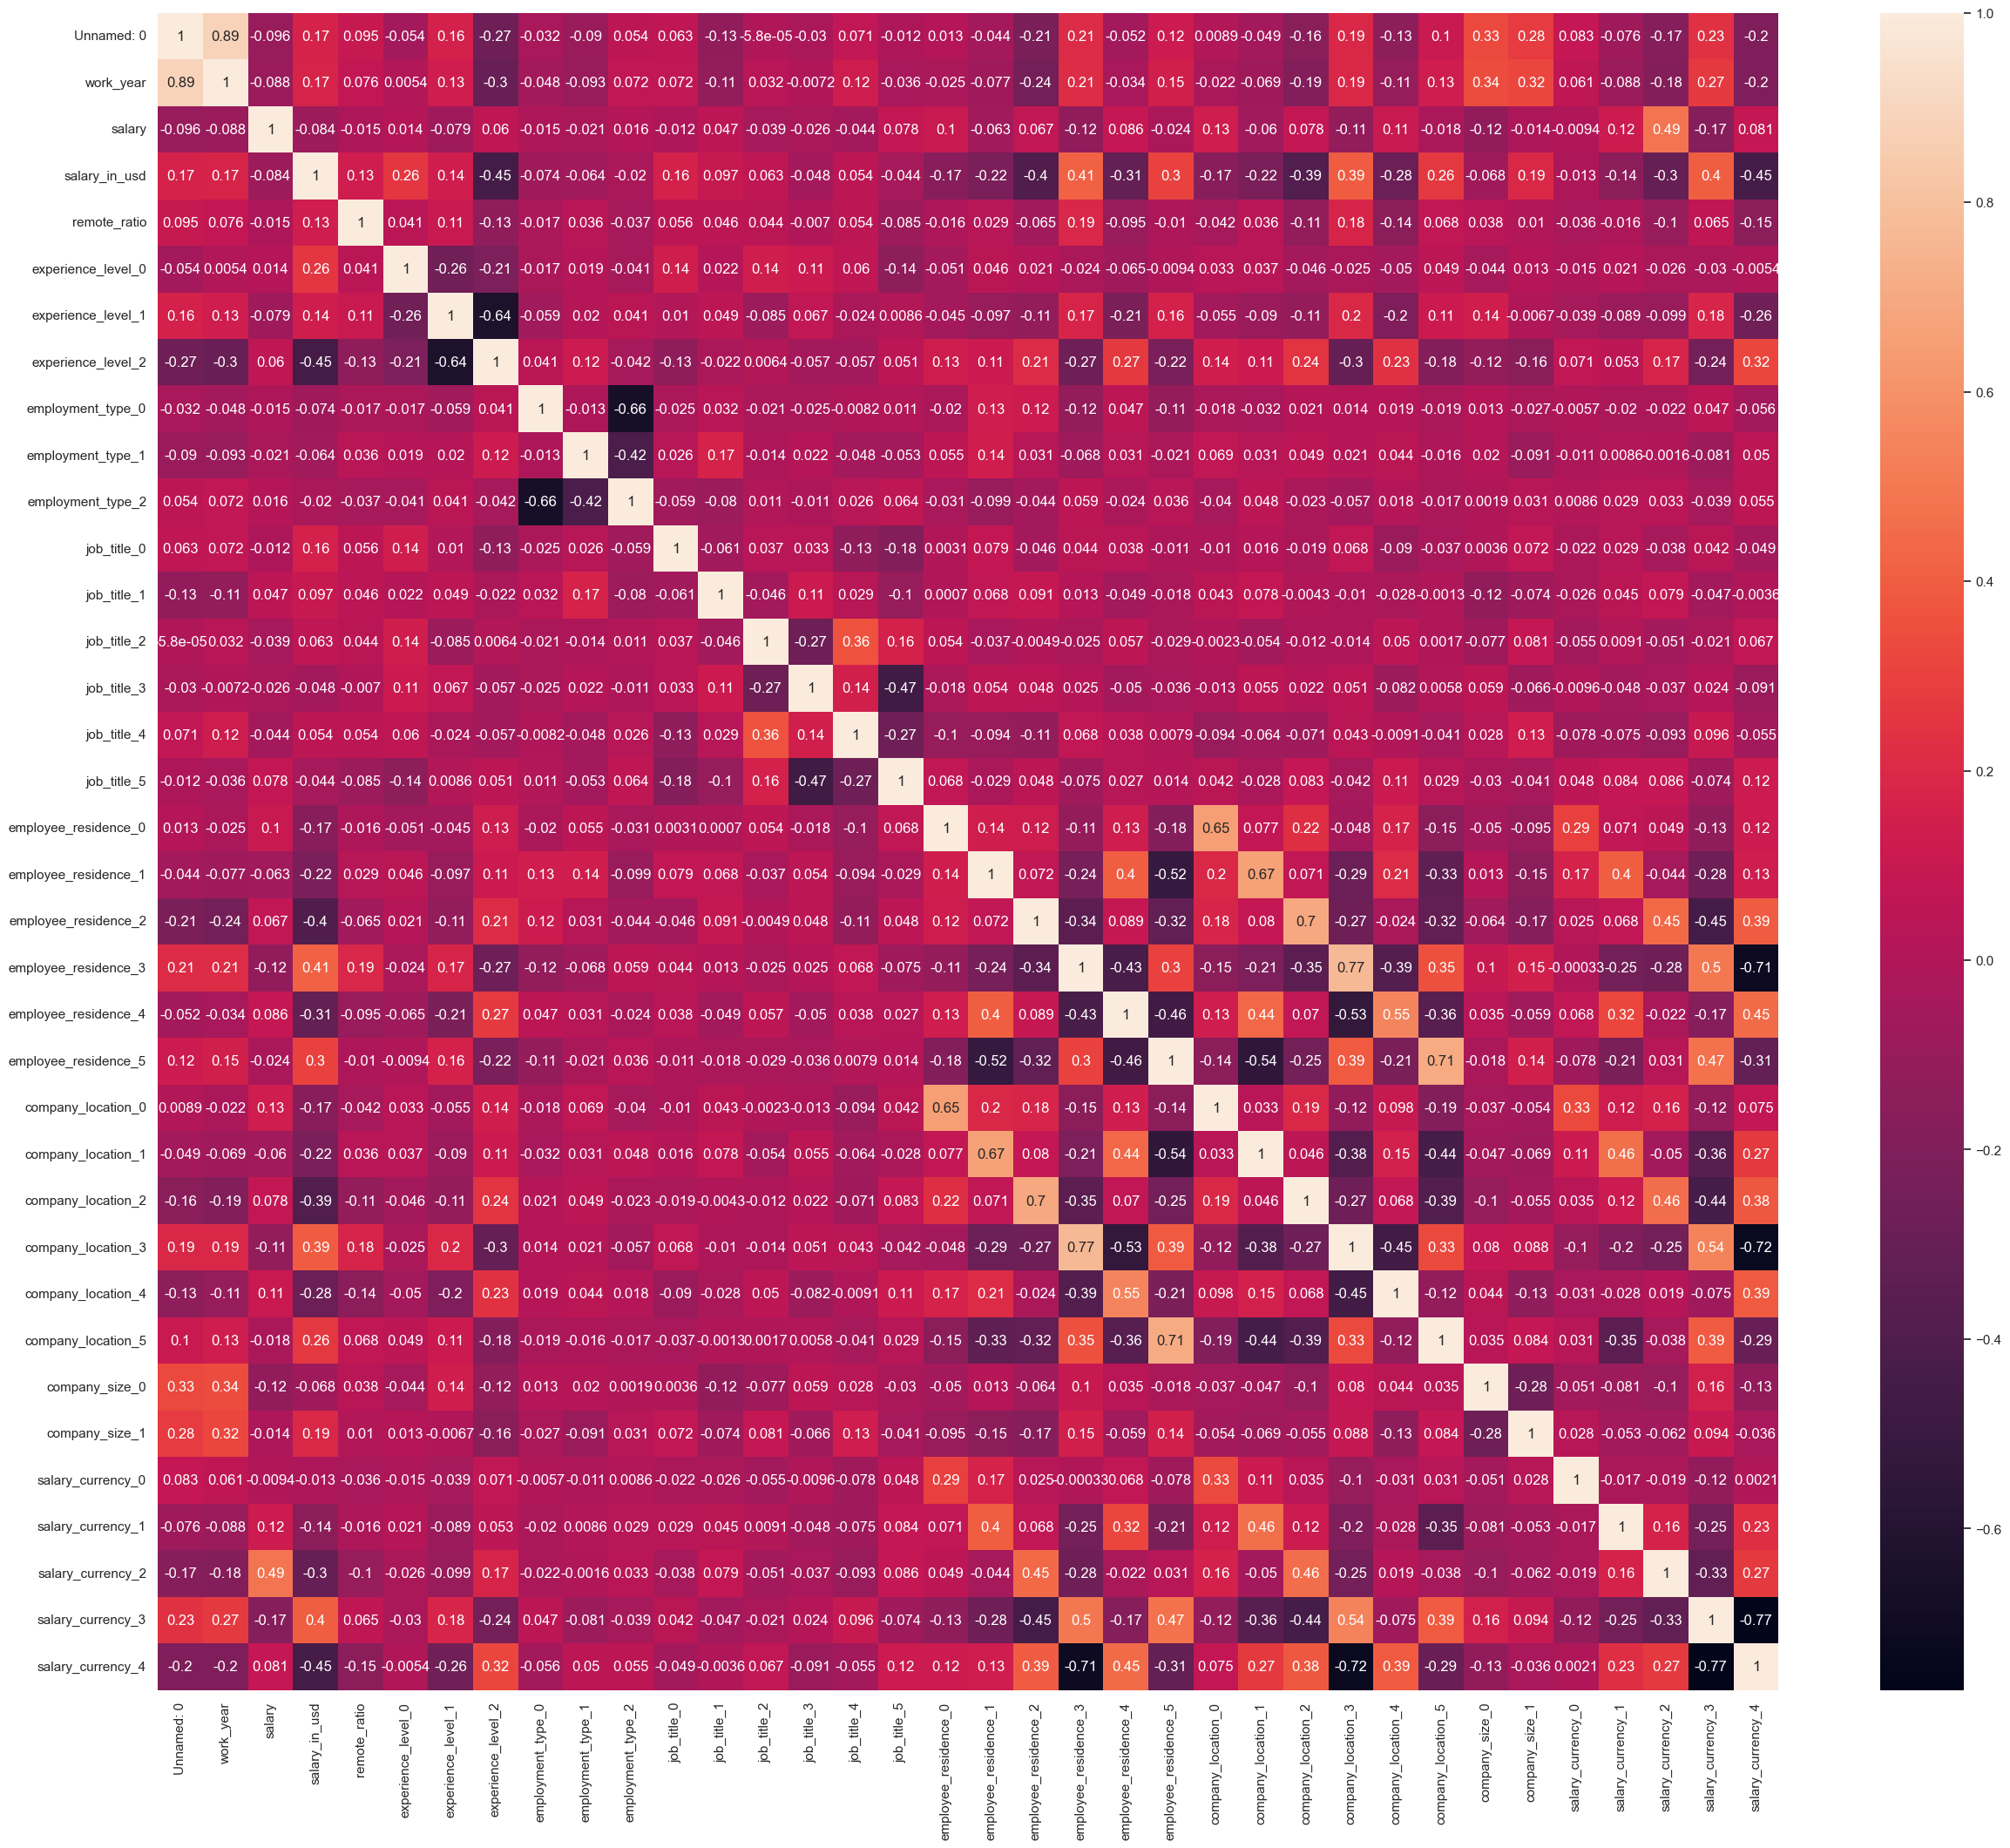

In [85]:
# data.corr()
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(data_bin.corr(numeric_only=True), annot=True)

 # Метод объекта Series
data[["work_year","salary","salary_in_usd"]]

In [96]:
data['salary']

0       70000
1      260000
2       85000
3       20000
4      150000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary, Length: 607, dtype: int64

In [97]:
# data.loc[[1,2]]

In [98]:
data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [99]:
data.index

RangeIndex(start=0, stop=607, step=1)

data.loc['Machine Learning Scientist']

In [100]:
data.index[0]

0

In [101]:
data.index.name = "experience_level"

In [102]:
data.to_numpy()

array([[0, 2020, 'MI', ..., 0, 'DE', 'L'],
       [1, 2020, 'SE', ..., 0, 'JP', 'S'],
       [2, 2020, 'SE', ..., 50, 'GB', 'M'],
       ...,
       [604, 2022, 'SE', ..., 0, 'US', 'M'],
       [605, 2022, 'SE', ..., 100, 'US', 'M'],
       [606, 2022, 'MI', ..., 100, 'US', 'L']], dtype=object)

data1 = data[['work_year', 'experience_level', 'employment_type', 'salary', 'salary_currency', 'salary_in_usd', 
              'employee_residence', 'remote_ratio', 'company_location', 'company_size']]

https://habr.com/ru/articles/444124/

Спасибо за работу! 
Ответ предоставлен файлом ipynb

Вы продуктивно поработали над домашним заданием! 
Приятно проверять такие работы, с качественным оформлением, логичной структурой и отличными выводами.
Обратил внимание на описание данных и постанову задач.

Плюсы работы:
- подгруженные данные проверены:
    - оценка количество дубликатов
    - наличие пропущенных значений,
    - оценка содержания типов данных в датасете.
- качественный визуальный анализ данных,
- методы визуализации соответствуют поставленной задачи по анализу данных,
- проведены дополнительные исследования.

Читая вашу работу, вижу, что вы проявили себя как датасайнетист, качественно подошли к решению поставленной задачи.  

Вы отлично сделали работу, но присутствует пара замечаний:
1. Вижу, что обратили внимание на чтение файла, в файле уже была колонка с индексами строк, в таких случаях следует указывать параметр index_col=[0]. Иначе у вас будет еще одна колонка с простой нумерацией и без названия
2. Проблема в том, что ее наличие указало на отсутствие дубликатов т.к. индексы уникальны, а фактически в датасете они есть. 
Чтобы обнаруживать такие моменты и выводят первые и последние данные датасета после его прочтения, чтобы самостоятельно посмотреть на структуру и содержание данных.

Также рекомендую оформлять все импорты в начале работы, не совсем понятно зачем в конце работы работа с  Series и перевод в  numpy без дальнейших расчетов

Все задания решены верно, обращу внимание на один из вопросов про рост заработной платы специалистов каждый год. Если брать среднее значение, то роста в 20-21 годах нет, а если брать медианное значение, то рост есть постоянный.
На такой результат сильно повлияли выбросы и небольшое количество записей в 2020 году.
Вы отлично справились с этим заданием.

Единственное рекомендовал бы оформлять расширенный итоговый вывод по работе. Пусть даже он будет повторять промежуточные выводы
Это всегда украсит вашу работу и впечатлит рекрутеров

Полезные материалы по теме:
https://nafi.ru/upload/spss/Lection_6.pdf
https://habr.com/ru/articles/444124/

Желаю успехов в обучении
МИ
Илья Маяковский
12 июля в 8:57